<a href="https://colab.research.google.com/github/sameersngh10/MLH-Visualization/blob/main/VIsualization_EDA_on_PIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:Orange;"><center>Pima Indians Diabetes - VIsualization and EDA</center></h1>

Table of Contents:
1. [Introduction](#1)
    - 1.1 [Context](#2)
    - 1.2 [Data Dictionary](#3)
    - 1.3 [Task](#4)
2. [Preparation](#5)
    - 2.1 [Packages](#6)
    - 2.2 [Data](#7)
    - 2.3 [Understanding Data](#8)
3. [Exploratory Data Analysis](#9)
    - 3.1 [Univariate Analysis](#10)
    - 3.2 [Bivariate Analysis](#11)
4. [Data Preprocessing](#12)
    - 4.1 [Conclusions from EDA](#13)
    - 4.2 [Removing the outliers](#14)
    - 4.3 [Removing the skewness](#15)
    - 4.4 [Making features model ready](#16)
5

### 1. Introduction <a id=1></a>

#### 1.1 Context <a id=2></a>
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### 1.2 Data Dictionary <a id=3></a>
`Pregnancies` - Number of times pregnant

`Glucose` - Plasma glucose concentration - 2 hours in an oral glucose tolerance test

`BloodPressure` - Diastolic blood pressure (mm Hg)

`SkinThickness` - Triceps skin fold thickness (mm)

`Insulin` - 2-Hour serum insulin (mu U/ml)

`BMI` - Body mass index

`DiabetesPedigreeFunction` - Diabetes pedigree function

`Age` - Age (years)

`Outcome` - Class variable (0 or 1)

### 2. Preparation <a id=5></a>

#### 2.1 Packages <a id=6></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
from termcolor import colored
warnings.filterwarnings("ignore")

#### 2.2 Data <a id=7></a>

In [ ]:
df = pd.read_csv('/content/pima-indians-diabetes.csv')

In [ ]:
#set column names
feature_names=['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age',	'Outcome']
df.columns=feature_names
df.target=['Outcome']

#### 2.3 Understanding Data <a id=8></a>

##### 2.3.1 The shape of the data

In [ ]:
print(f"Shape of dataset: {colored(df.shape, 'yellow')}")

Shape of dataset: (767, 9)


##### 2.3.2 Preview of the first five rows of the data

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


##### 2.3.3 Renaming `DiabetesPedigreeFunction` to `DPF` for better consistency

In [ ]:
df = df.rename(columns = {'DiabetesPedigreeFunction':'DPF'})

##### 2.3.4 Checking the number of unique values in each column

In [ ]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DPF,516
Age,52
Outcome,2


##### 2.3.5 Separating into features and targets

In [ ]:
con_cols = list(df.drop('Outcome',axis=1).columns)
target = ['Outcome']
print(f"The columns are : {colored(con_cols, 'yellow')}")
print(f"The target is   : {colored(target,'yellow')}")

The columns are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']
The target is   : ['Outcome']


##### 2.3.6 Summary statistics

In [ ]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,767.0,3.842243,3.370877,0.000,1.0000,3.000,6.000,17.00
Glucose,767.0,120.859192,31.978468,0.000,99.0000,117.000,140.000,199.00
BloodPressure,767.0,69.101695,19.368155,0.000,62.0000,72.000,80.000,122.00
SkinThickness,767.0,20.517601,15.954059,0.000,0.0000,23.000,32.000,99.00
Insulin,767.0,79.903520,115.283105,0.000,0.0000,32.000,127.500,846.00
BMI,767.0,31.990482,7.889091,0.000,27.3000,32.000,36.600,67.10
DPF,767.0,0.471674,0.331497,0.078,0.2435,0.371,0.625,2.42
Age,767.0,33.219035,11.752296,21.000,24.0000,29.000,41.000,81.00


##### 2.3.6 Missing values

In [ ]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

### 3. Exploratory Data Analysis <a id=9></a>

#### 3.1 Univariate Analysis <a id=10></a>

##### 3.1.1 Count of target variable

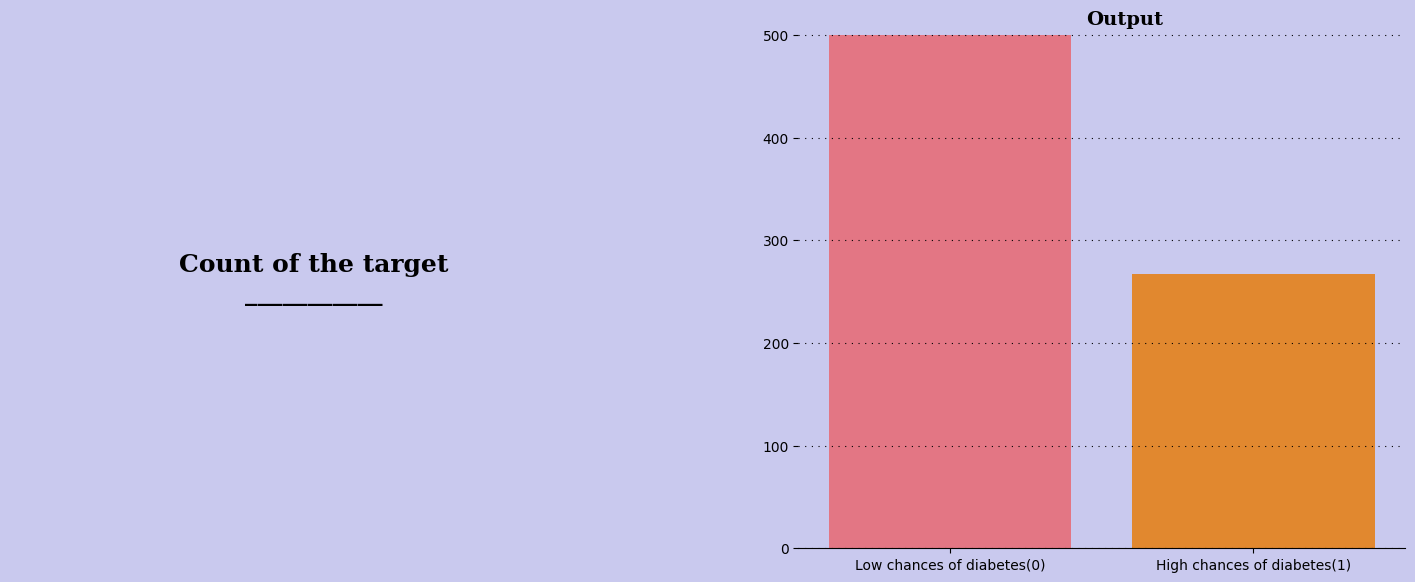

In [ ]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#c9c9ee"
color_palette = ["#f56476","#ff8811","#001427","#6369d1","#f0f66e"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.45,510,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'Outcome',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of diabetes(0)","High chances of diabetes(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

##### 3.1.2 Boxenplot of features

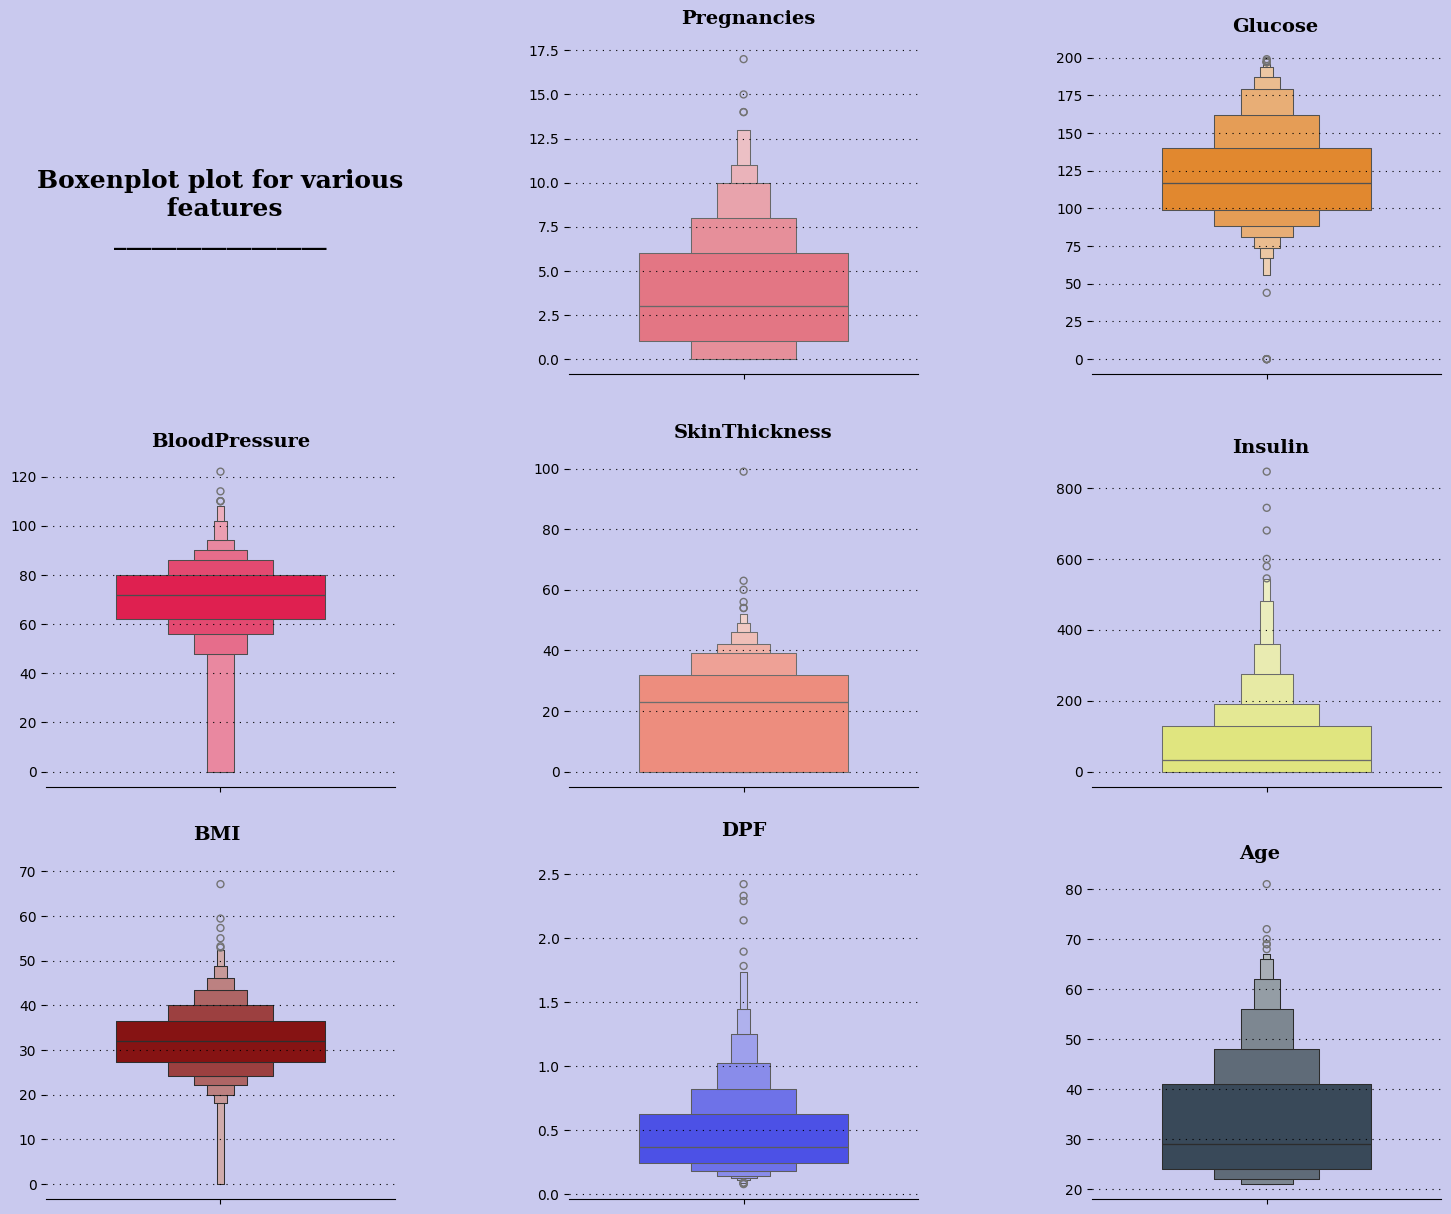

In [ ]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#c9c9ee"
# c9c9ee
color_palette = ["#f56476","#ff8811","#ff0040","#ff7f6c","#f0f66e","#990000"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxenplot plot for various\n features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Pregnancies
ax1.text(-0.18, 19, 'Pregnancies', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['Pregnancies'],palette=["#f56476"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Glucose
ax2.text(-0.1, 217, 'Glucose', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['Glucose'],palette=["#ff8811"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# BloodPressure
ax3.text(-0.20, 132, 'BloodPressure', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['BloodPressure'],palette=["#ff0040"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# SkinThickness
ax4.text(-.2, 110, 'SkinThickness', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['SkinThickness'],palette=["#ff7f6c"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Insulin
ax5.text(-0.10, 900, 'Insulin', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['Insulin'],palette=["#f0f66e"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

# BMI
ax6.text(-0.08, 77, 'BMI', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax6,y=df['BMI'],palette=["#990000"],width=0.6)
ax6.set_xlabel("")
ax6.set_ylabel("")

# DPF
ax7.text(-0.065, 2.8, 'DPF', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax7,y=df['DPF'],palette=["#3339FF"],width=0.6)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Age
ax8.text(-0.08, 86, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax8,y=df['Age'],palette=["#34495E"],width=0.6)
ax8.set_xlabel("")
ax8.set_ylabel("")



for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

##### 3.1.3 Histogram of features

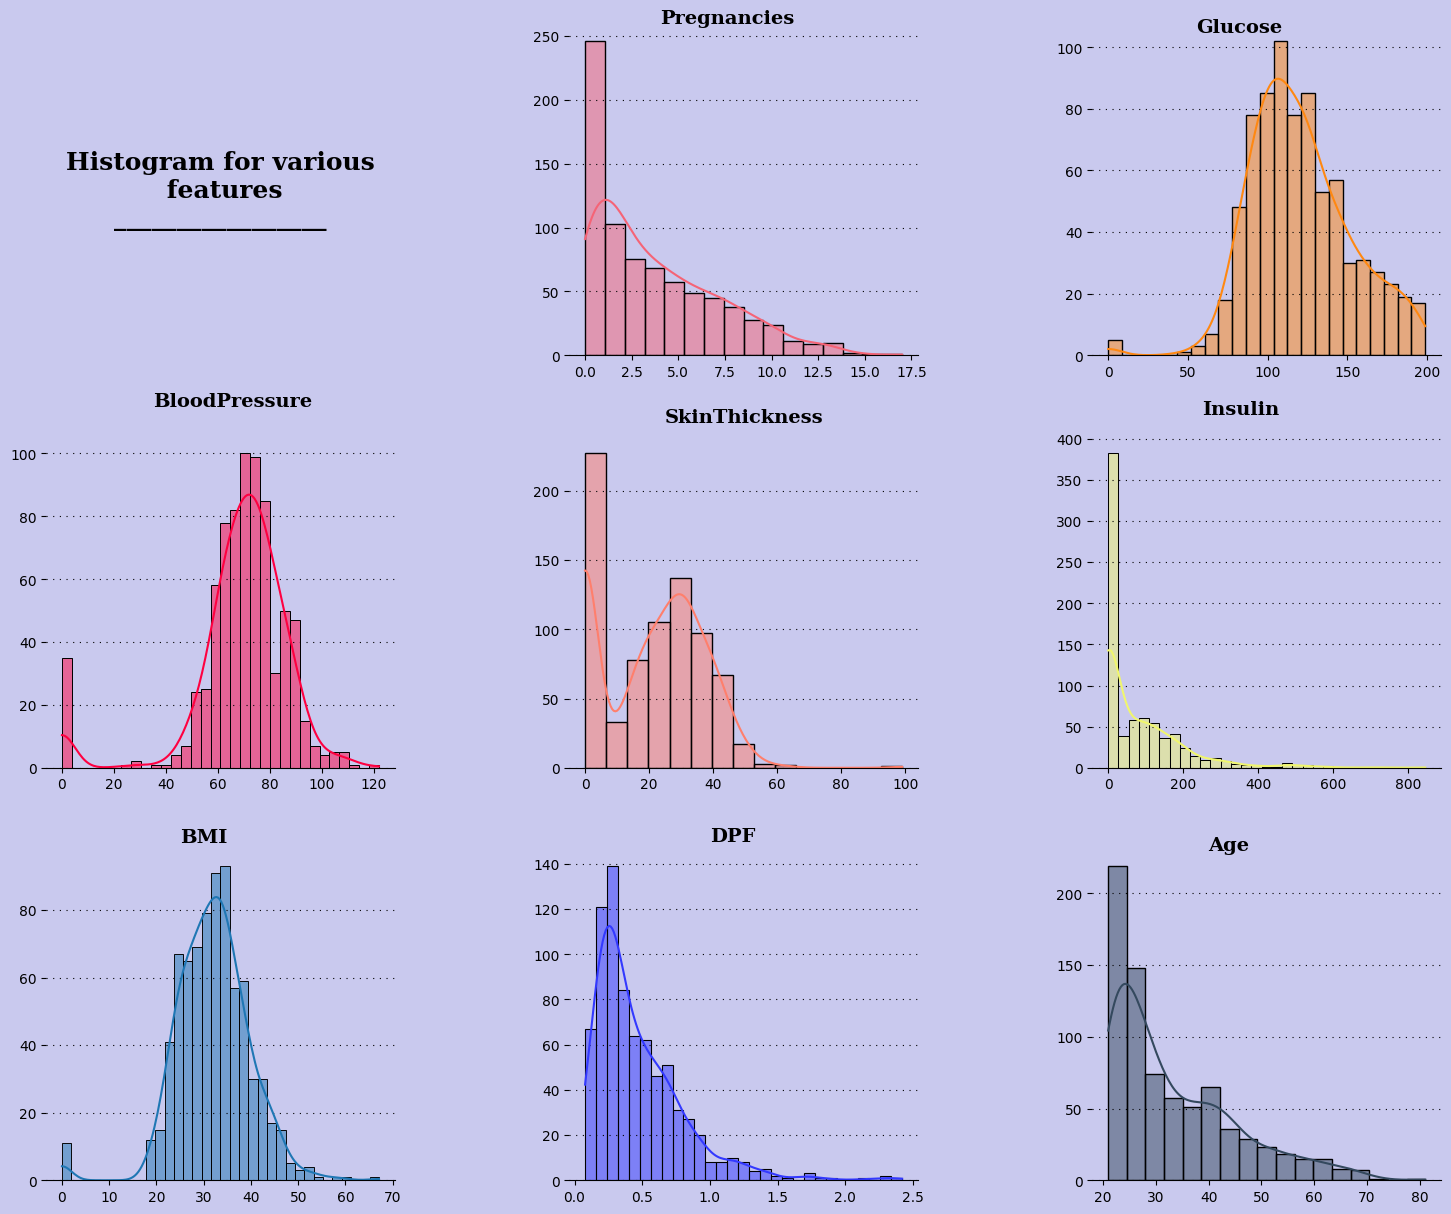

In [ ]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#c9c9ee"
# c9c9ee
color_palette = ["#f56476","#ff8811","#ff0040","#ff7f6c","#f0f66e","#990000"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Histogram for various\n features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Pregnancies
ax1.text(4, 260, 'Pregnancies', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax1,x=df['Pregnancies'],color="#f56476",kde=True)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Glucose
ax2.text(55, 105, 'Glucose', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax2,x=df['Glucose'],color="#ff8811",kde=True)
ax2.set_xlabel("")
ax2.set_ylabel("")

# BloodPressure
ax3.text(35, 115, 'BloodPressure', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax3,x=df['BloodPressure'],color="#ff0040",kde=True)
ax3.set_xlabel("")
ax3.set_ylabel("")

# SkinThickness
ax4.text(25, 250, 'SkinThickness', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax4,x=df['SkinThickness'],color="#ff7f6c",kde=True)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Insulin
ax5.text(250, 430, 'Insulin', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax5,x=df['Insulin'],color="#f0f66e",kde=True)
ax5.set_xlabel("")
ax5.set_ylabel("")

# BMI
ax6.text(25, 100, 'BMI', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax6,x=df['BMI'],palette=["#990000"],kde=True)
ax6.set_xlabel("")
ax6.set_ylabel("")

# DPF
ax7.text(1, 150, 'DPF', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax7,x=df['DPF'],color="#3339FF",kde=True)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Age
ax8.text(40, 230, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax8,x=df['Age'],color="#34495E",kde=True)
ax8.set_xlabel("")
ax8.set_ylabel("")


for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

#### 3.2 Bivariate Analysis <a id=11></a>

##### 3.2.1 Correlation matrix of features

In [ ]:
df_corr = df.corr().transpose()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
Glucose,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
BloodPressure,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
SkinThickness,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
Insulin,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
BMI,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
DPF,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
Age,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
Outcome,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


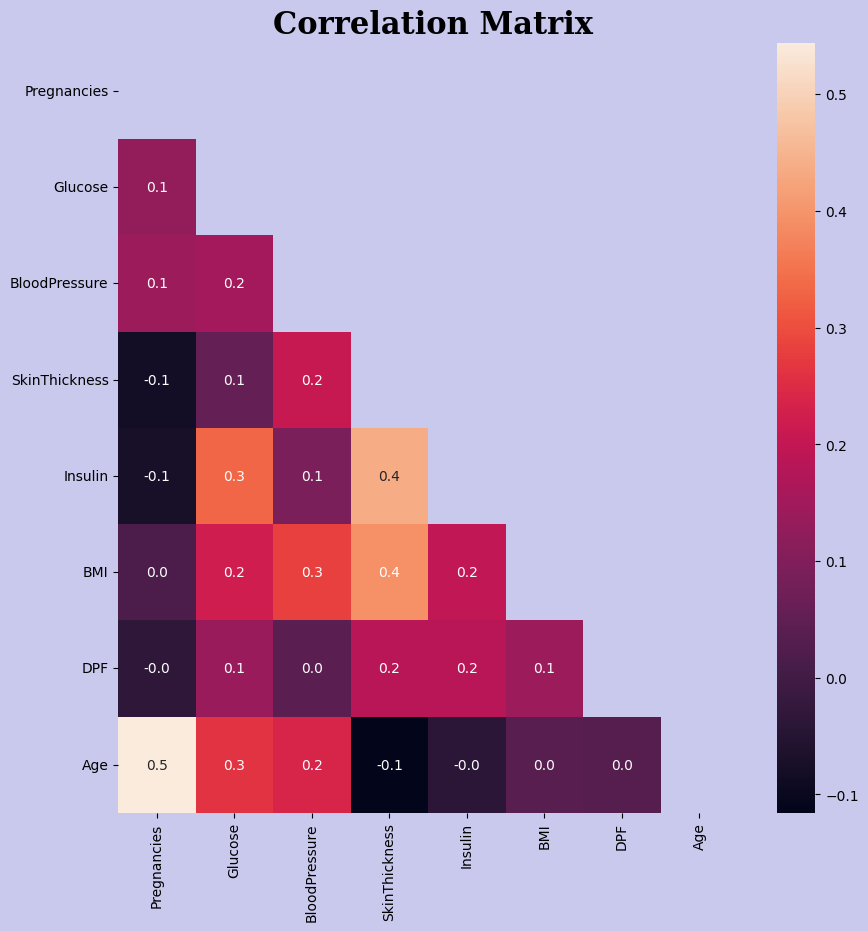

In [ ]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)

df_corr = df[con_cols].corr().transpose()
mask = np.triu(np.ones_like(df_corr))
ax0.text(2,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True)
plt.show()

##### 3.2.2 Distribution of features according to target variable

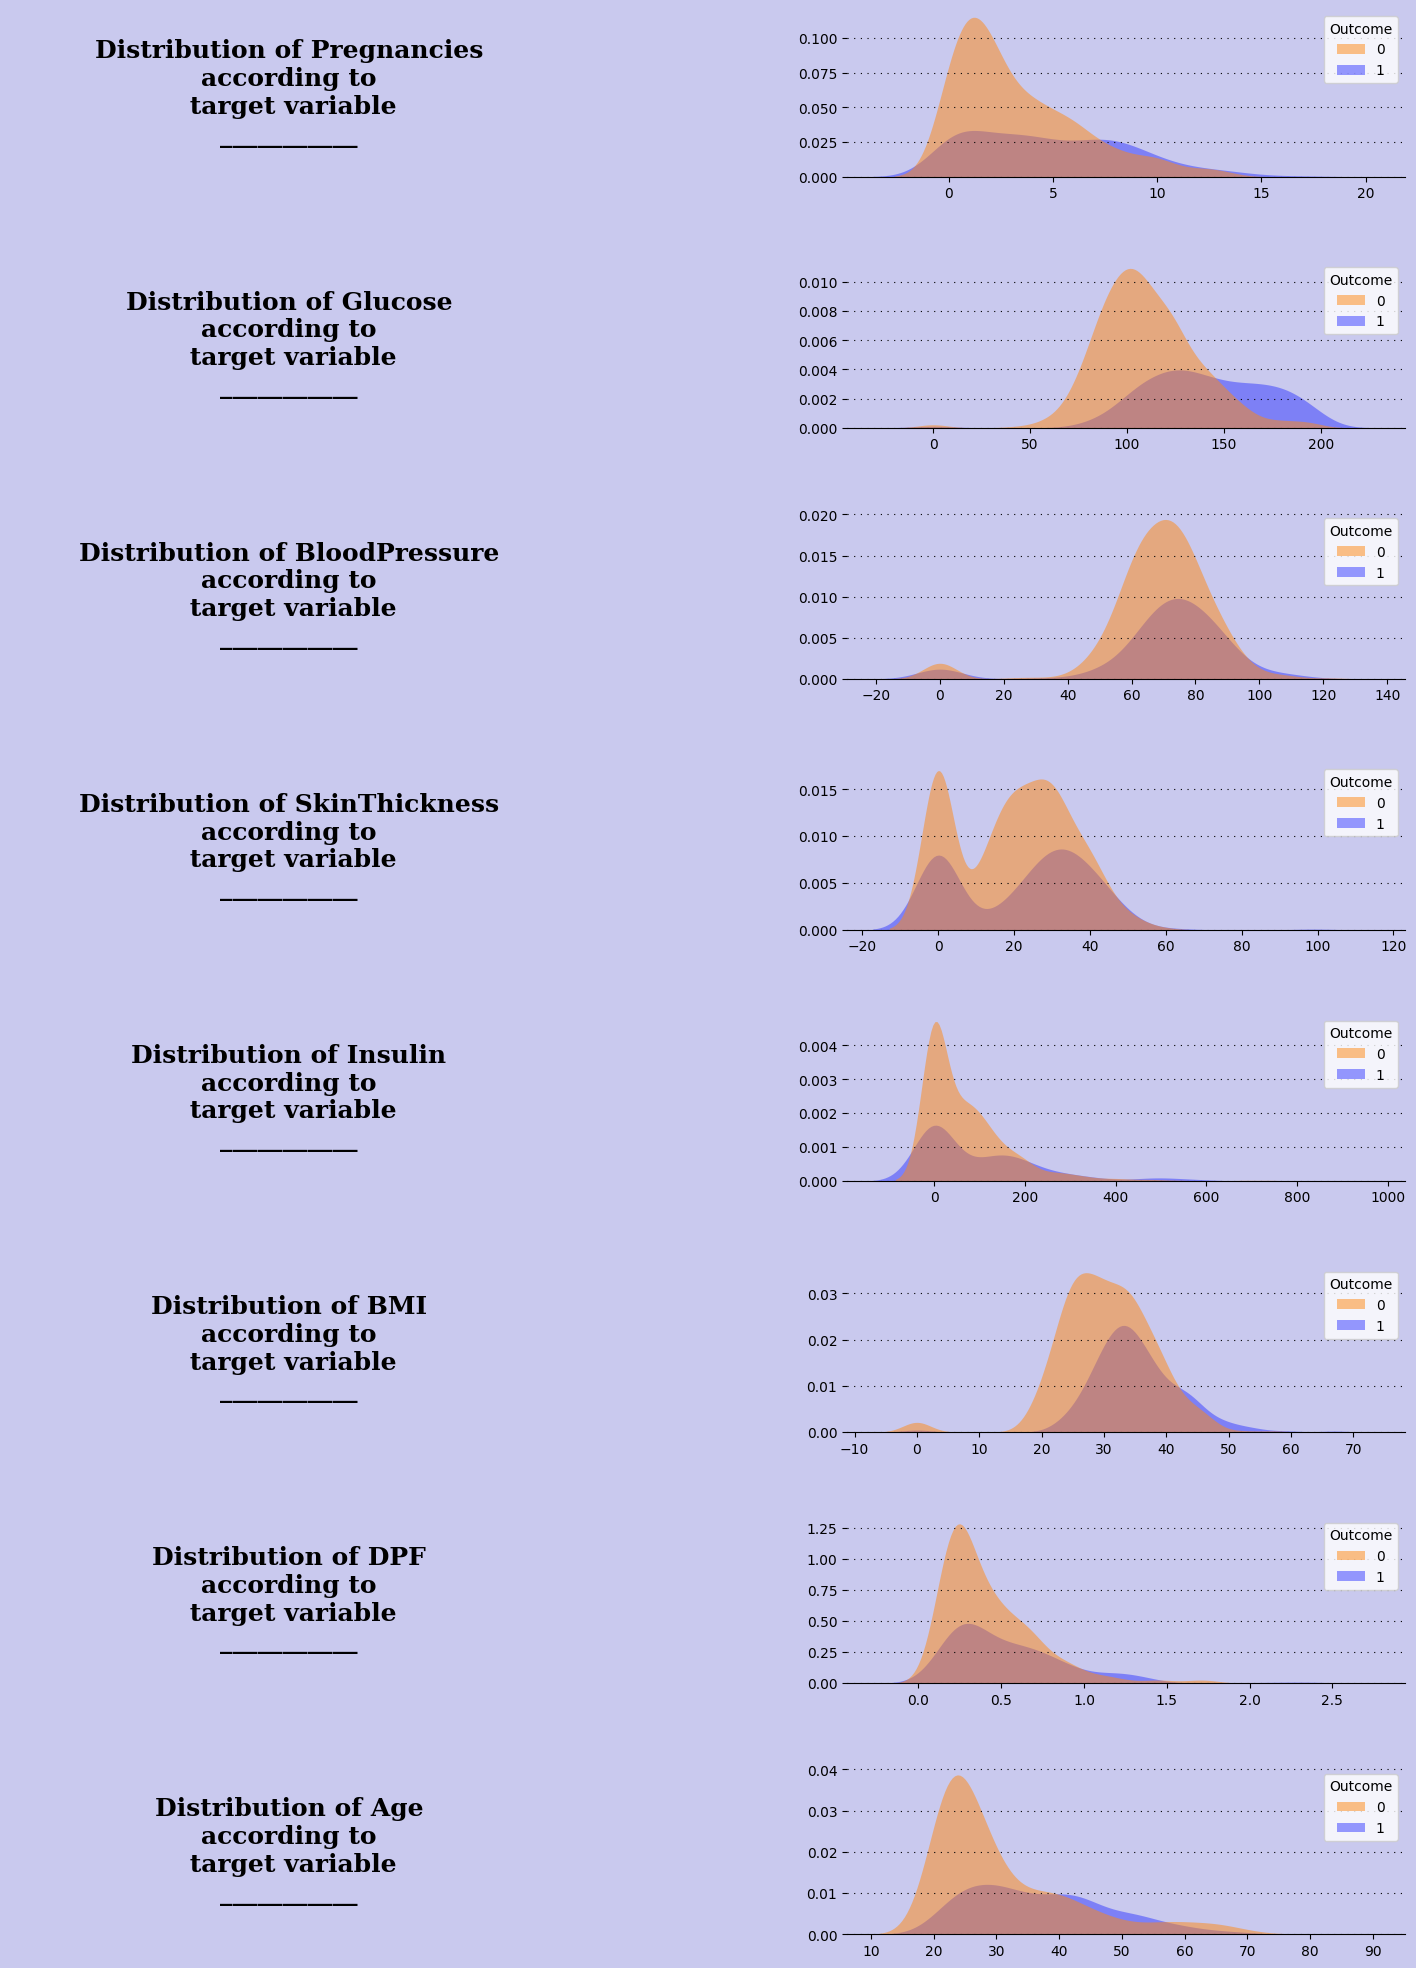

In [ ]:
fig = plt.figure(figsize=(18,25))
gs = fig.add_gridspec(8,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])
ax12 = fig.add_subplot(gs[6,0])
ax13 = fig.add_subplot(gs[6,1])
ax14 = fig.add_subplot(gs[7,0])
ax15 = fig.add_subplot(gs[7,1])


background_color = "#c9c9ee"
color_palette = ["#f56476","#ff8811","#ff0040","#ff7f6c","#f0f66e","#990000"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)
ax12.set_facecolor(background_color)
ax13.set_facecolor(background_color)
ax14.set_facecolor(background_color)
ax15.set_facecolor(background_color)

# Pregnancies title
ax0.text(0.5,0.5,"Distribution of Pregnancies\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Pregnancies
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='Pregnancies',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Glucose title
ax2.text(0.5,0.5,"Distribution of Glucose\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Glucose
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='Glucose',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# BloodPressure title
ax4.text(0.5,0.5,"Distribution of BloodPressure\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# BloodPressure
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='BloodPressure',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# SkinThickness title
ax6.text(0.5,0.5,"Distribution of SkinThickness\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# SkinThickness
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='SkinThickness',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Insulin title
ax8.text(0.5,0.5,"Distribution of Insulin\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Insulin
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='Insulin',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

# BMI title
ax10.text(0.5,0.5,"Distribution of BMI\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)

# BMI
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax11, data=df, x='BMI',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax11.set_xlabel("")
ax11.set_ylabel("")

# DPF title
ax12.text(0.5,0.5,"Distribution of DPF\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax12.spines["bottom"].set_visible(False)
ax12.set_xticklabels([])
ax12.set_yticklabels([])
ax12.tick_params(left=False, bottom=False)

# DPF
ax13.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax13, data=df, x='DPF',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax13.set_xlabel("")
ax13.set_ylabel("")

# Age title
ax14.text(0.5,0.5,"Distribution of Age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax14.spines["bottom"].set_visible(False)
ax14.set_xticklabels([])
ax14.set_yticklabels([])
ax14.tick_params(left=False, bottom=False)

# Age
ax15.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax15, data=df, x='Age',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax15.set_xlabel("")
ax15.set_ylabel("")



for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)
    ax12.spines[i].set_visible(False)
    ax13.spines[i].set_visible(False)
    ax14.spines[i].set_visible(False)
    ax15.spines[i].set_visible(False)


##### 3.2.3 Pair plot - one plot to rule them all

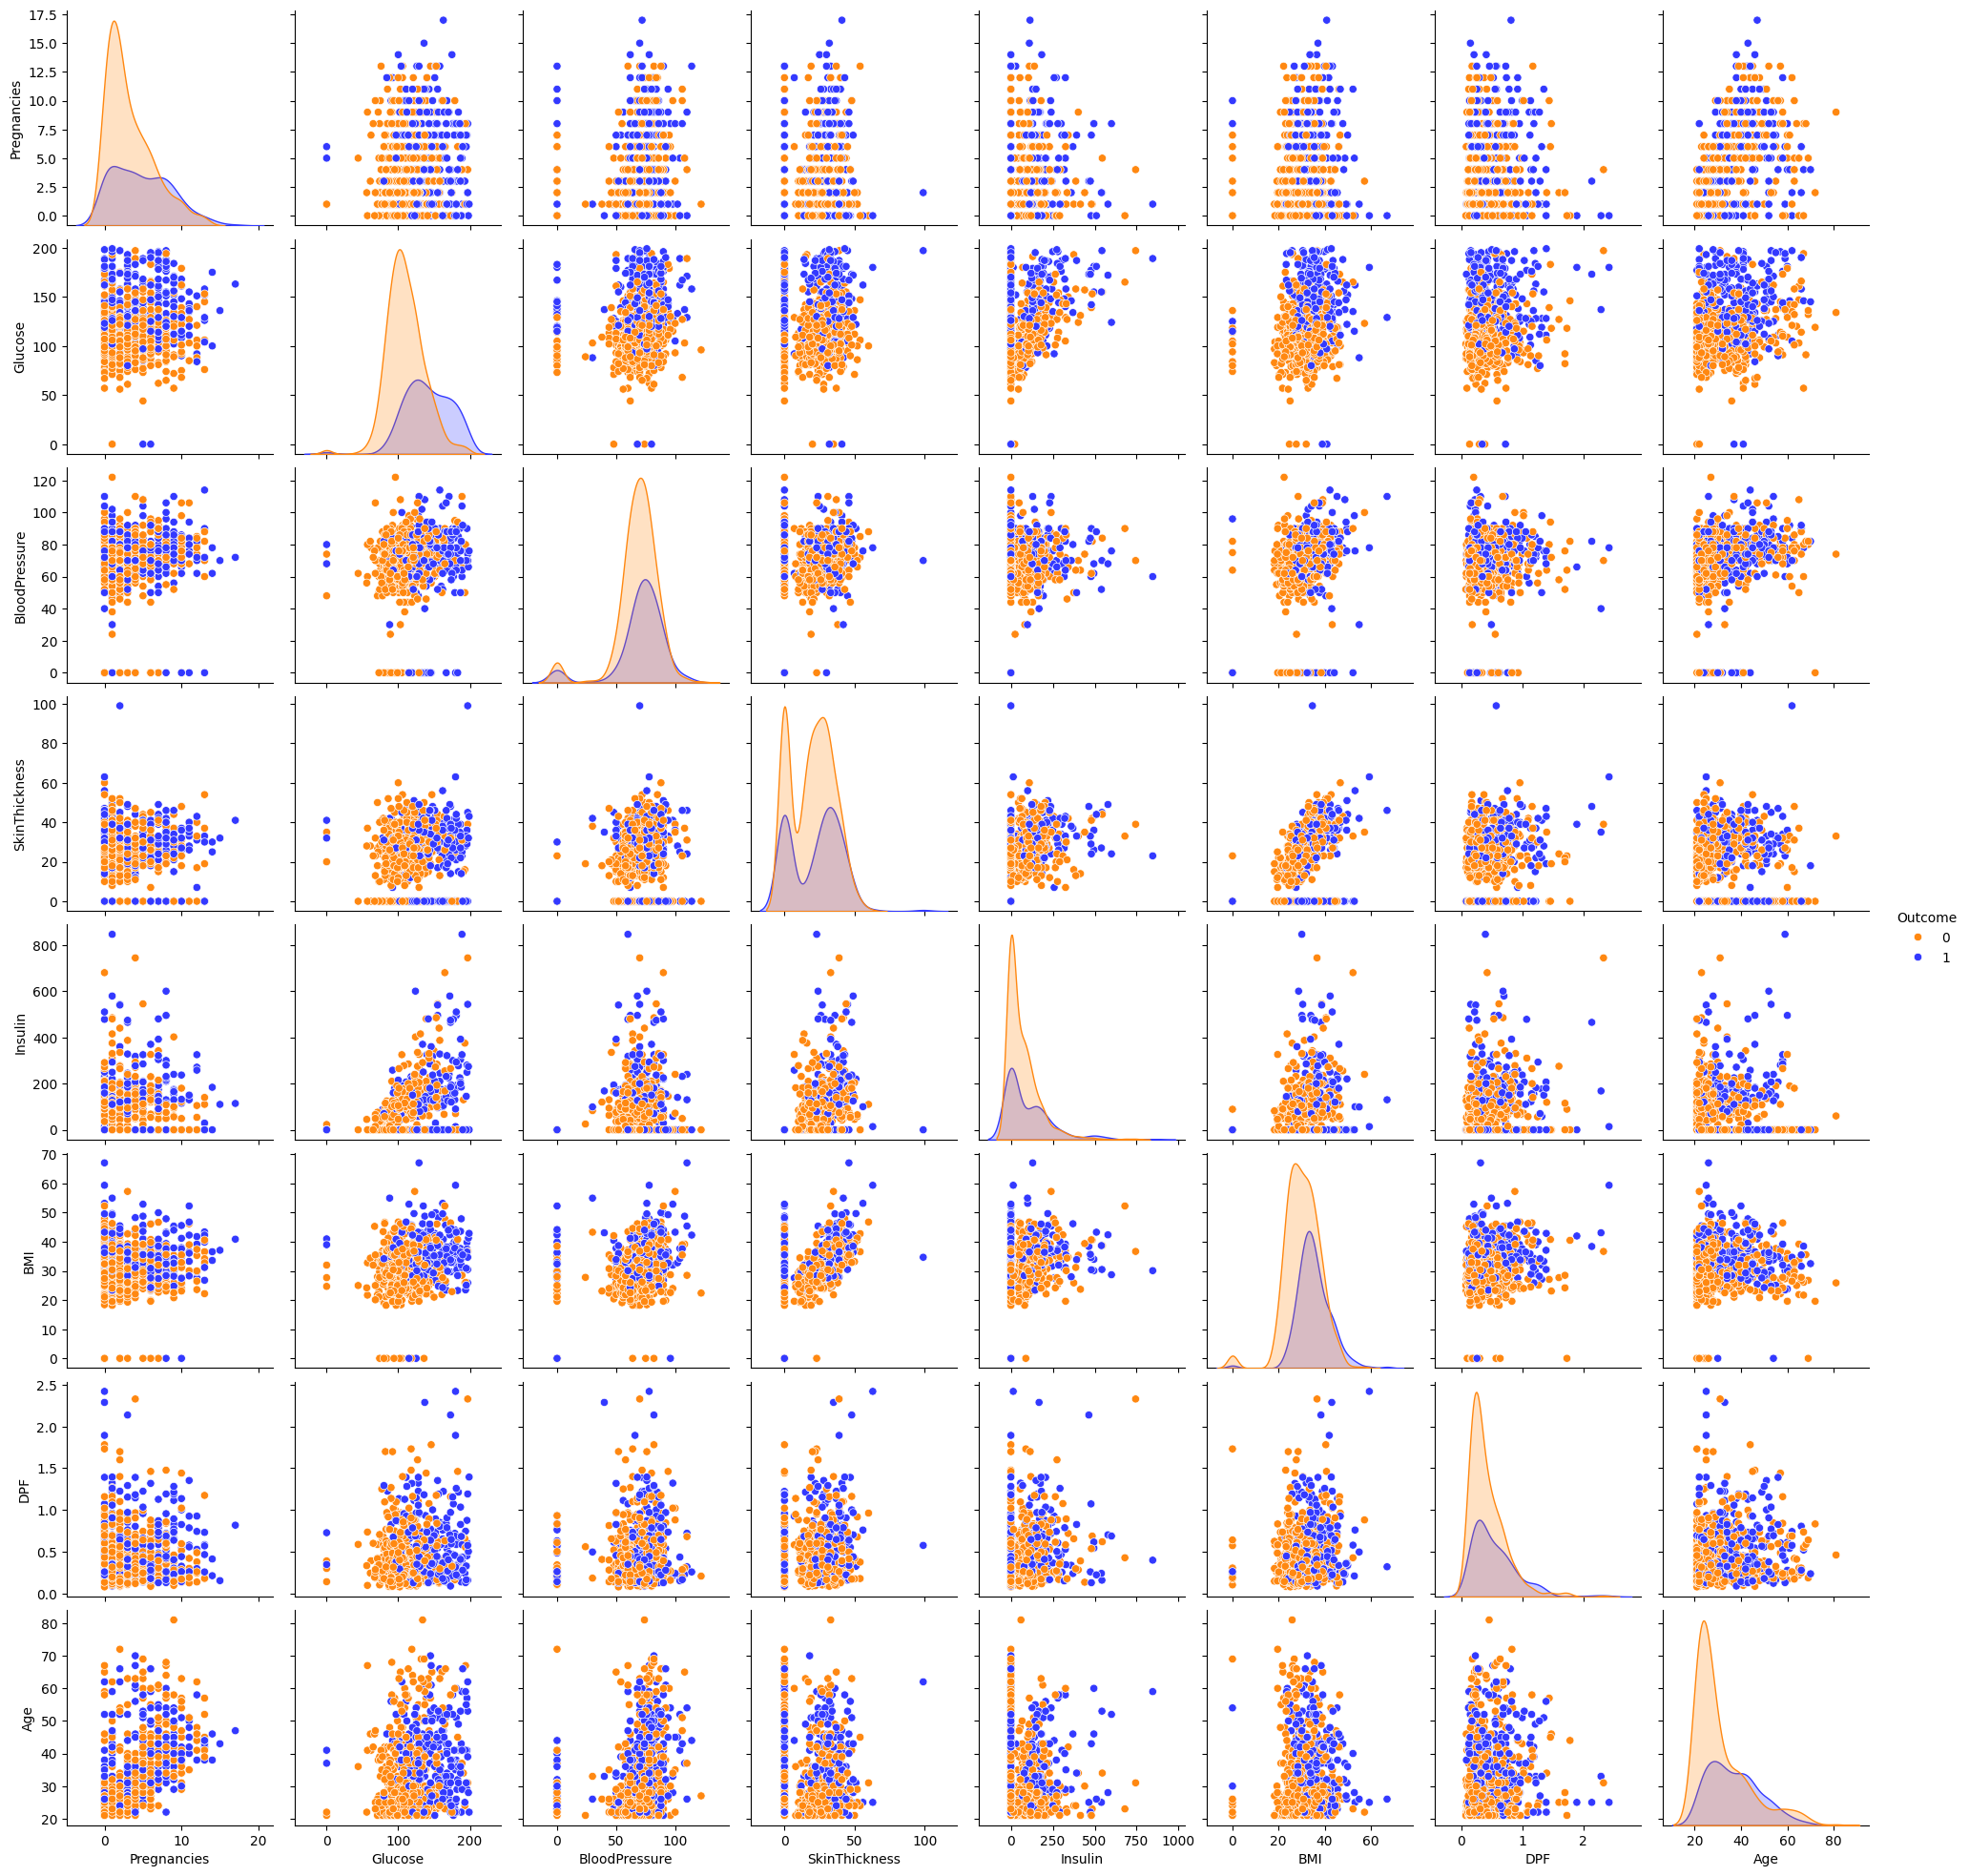

In [ ]:
sns.pairplot(df,hue='Outcome',palette = ["#ff8811","#3339FF"])
plt.show()

##### 3.2.4 Scatter plot of BloodPressure vs Glucose vs Age wrt Outcome

In [ ]:
fig = px.scatter_3d(df, x='Age', y='Glucose', z='BloodPressure',
              color='Outcome',size_max=18,color_continuous_scale=["#3339FF", "#ff8811"])
fig.update_layout({"template":"plotly_dark"})
fig.show()

##### 3.2.5 Scatter plot of Glucose vs Insulin vs DPF wrt Outcome

In [ ]:
fig = px.scatter_3d(df, x='Glucose', y='Insulin', z='DPF',
              color='Outcome',size_max=18,color_continuous_scale=["#3339FF", "#ff8811"])
fig.update_layout({"template":"plotly_dark"})
fig.show()

<Axes: xlabel='Insulin', ylabel='Density'>

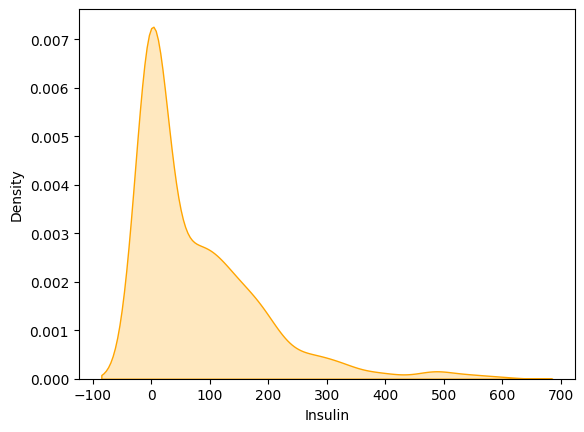

In [ ]:
sns.kdeplot(df['Insulin'],color='Orange',fill=True)

##### 4.3.2 Removing the skewness using a log function and checking the distribution again

<Axes: xlabel='Insulin', ylabel='Density'>

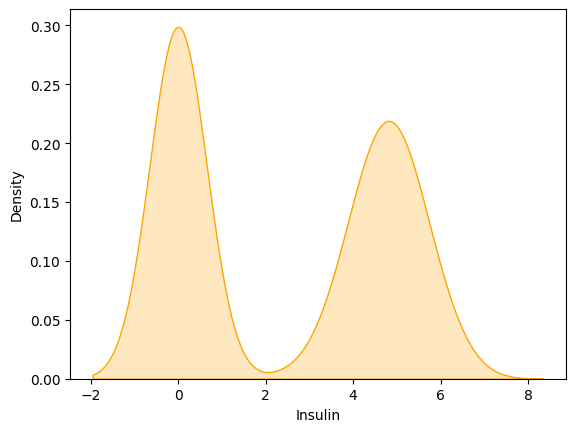

In [ ]:
df['Insulin'] = df['Insulin'].map(lambda i : np.log(i) if i > 0 else 0)
sns.kdeplot(df['Insulin'],color='Orange',fill=True)